## Import

In [ ]:
%pip install rasterio >/dev/null
%pip install rioxarray >/dev/null

In [ ]:
import xarray as xr
import pandas as pd
import rasterio
from rasterio.mask import mask
from rasterio.transform import from_bounds
import rioxarray
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from google.colab import drive

## Init

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
main_data_folder = "drive/MyDrive/perso/GenHack/"

# Administration geometries from GADM

[GADM](https://gadm.org/) provides maps and spatial data for all countries and their sub-divisions. Here is a light version limited to European countries.

In [ ]:
gadm_filepath = main_data_folder + "GADM/gadm_410_europe.gpkg"

## Parametrize

In [ ]:
country = "France" # France
cityname = "Lyon"

## Manipulate and vizualize

In [ ]:
# Load geographical datas
gadm_gdf = gpd.read_file(gadm_filepath)

Number of rows in GADM: 106252


In [ ]:
print(f"Number of rows in GADM: {len(gadm_gdf)}")

Number of rows in GADM: 106252


In [ ]:
gadm_gdf.columns

Index(['UID', 'GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'ENGTYPE_1', 'GID_2',
       'NAME_2', 'ENGTYPE_2', 'GID_3', 'NAME_3', 'ENGTYPE_3', 'GID_4',
       'NAME_4', 'ENGTYPE_4', 'GID_5', 'NAME_5', 'ENGTYPE_5', 'COUNTRY',
       'CONTINENT', 'geometry'],
      dtype='object')

In [228]:
filtered_gadm_gdf = gadm_gdf[(gadm_gdf.COUNTRY == country) & (gadm_gdf.NAME_3 == cityname)]

print(f"Number of rows in GADM after filtering: {len(filtered_gadm_gdf)}")

# filtered_gadm_gdf["NAME_4"].unique()

Number of rows in GADM after filtering: 170


array(['Bron', 'Caluire-et-Cuire', 'Condrieu', 'Décines-Charpieu',
       'Écully', 'Givors', 'Irigny', "L'Arbresle", 'Limonest',
       'Lyon, 1er arrondissement', 'Lyon, 2e arrondissement',
       'Lyon, 3e arrondissement', 'Lyon, 4e arrondissement',
       'Lyon, 5e arrondissement', 'Lyon, 6e arrondissement',
       'Lyon, 7e arrondissement', 'Lyon, 8e arrondissement',
       'Lyon, 9e arrondissement', 'Meyzieu', 'Mornant',
       'Neuville-sur-Saône', 'Oullins', 'Rillieux-la-Pape', 'Saint-Fons',
       'Saint-Genis-Laval', 'Saint-Laurent-de-Chamousset', 'Saint-Priest',
       "Saint-Symphorien-d'Ozon", 'Saint-Symphorien-sur-Coise',
       'Sainte-Foy-lès-Lyon', 'Tassin-la-Demi-Lune', 'Vaugneray',
       'Vaulx-en-Velin', 'Vénissieux', 'Villeurbanne'], dtype=object)

,UID,GID_0,NAME_0,GID_1,NAME_1,ENGTYPE_1,GID_2,NAME_2,ENGTYPE_2,GID_3,...,ENGTYPE_3,GID_4,NAME_4,ENGTYPE_4,GID_5,NAME_5,ENGTYPE_5,COUNTRY,CONTINENT,geometry
19015,59374,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,Region,FRA.1.11_1,Rhône,Department,FRA.1.11.1_1,...,Districts,FRA.1.11.1.32_1,Vaugneray,Canton,FRA.1.11.1.32.1_1,Brindas,Commune,France,Europe,"MULTIPOLYGON (((4.70999 45.69846, 4.70773 45.6..."
19016,59375,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,Region,FRA.1.11_1,Rhône,Department,FRA.1.11.1_1,...,Districts,FRA.1.11.1.32_1,Vaugneray,Canton,FRA.1.11.1.32.2_1,Charbonnières-les-Bains,Commune,France,Europe,"MULTIPOLYGON (((4.73185 45.78752, 4.75256 45.7..."
19017,59376,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,Region,FRA.1.11_1,Rhône,Department,FRA.1.11.1_1,...,Districts,FRA.1.11.1.32_1,Vaugneray,Canton,FRA.1.11.1.32.3_1,Courzieu,Commune,France,Europe,"MULTIPOLYGON (((4.54855 45.75181, 4.56853 45.7..."
19018,59377,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,Region,FRA.1.11_1,Rhône,Department,FRA.1.11.1_1,...,Districts,FRA.1.11.1.32_1,Vaugneray,Canton,FRA.1.11.1.32.4_1,Craponne,Commune,France,Europe,"MULTIPOLYGON (((4.75234 45.75022, 4.72756 45.7..."
19019,59378,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,Region,FRA.1.11_1,Rhône,Department,FRA.1.11.1_1,...,Districts,FRA.1.11.1.32_1,Vaugneray,Canton,FRA.1.11.1.32.5_1,Grézieu-la-Varenne,Commune,France,Europe,"MULTIPOLYGON (((4.71197 45.73542, 4.69849 45.7..."
19020,59379,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,Region,FRA.1.11_1,Rhône,Department,FRA.1.11.1_1,...,Districts,FRA.1.11.1.32_1,Vaugneray,Canton,FRA.1.11.1.32.6_1,Marcy-l'Étoile,Commune,France,Europe,"MULTIPOLYGON (((4.70666 45.79422, 4.71977 45.7..."
19021,59380,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,Region,FRA.1.11_1,Rhône,Department,FRA.1.11.1_1,...,Districts,FRA.1.11.1.32_1,Vaugneray,Canton,FRA.1.11.1.32.7_1,Messimy,Commune,France,Europe,"MULTIPOLYGON (((4.70773 45.69969, 4.69872 45.6..."
19022,59381,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,Region,FRA.1.11_1,Rhône,Department,FRA.1.11.1_1,...,Districts,FRA.1.11.1.32_1,Vaugneray,Canton,FRA.1.11.1.32.8_1,Pollionnay,Commune,France,Europe,"MULTIPOLYGON (((4.61753 45.75615, 4.62614 45.7..."
19023,59382,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,Region,FRA.1.11_1,Rhône,Department,FRA.1.11.1_1,...,Districts,FRA.1.11.1.32_1,Vaugneray,Canton,FRA.1.11.1.32.9_1,Saint-Genis-les-Ollières,Commune,France,Europe,"MULTIPOLYGON (((4.71518 45.76785, 4.73394 45.7..."
19024,59383,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,Region,FRA.1.11_1,Rhône,Department,FRA.1.11.1_1,...,Districts,FRA.1.11.1.32_1,Vaugneray,Canton,FRA.1.11.1.32.10_1,Saint-Laurent-de-Vaux,Commune,France,Europe,"MULTIPOLYGON (((4.64485 45.70703, 4.64157 45.7..."


In [ ]:
one_city_gdf = filtered_gadm_gdf.dissolve()

<Axes: >

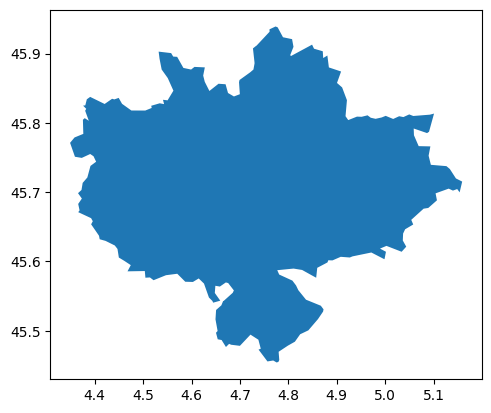

In [ ]:
one_city_gdf.plot()

Warning! Depending on the country you're studying, the administrative level of the city might be different.

For example, "Berlin" in Germany requires the `gadm_gdf.NAME_2 == cityname` condition (ie. admin level 2), however "Lille" in France requires the `gadm_gdf.NAME_5 == cityname` condition (ie. admin level 5).

It can even vary within a country if a city is divided in boroughs (ex: "Paris" in France requires the `gadm_gdf.NAME_2 == cityname` condition (ie. admin level 2)).

# ERA5-Land Meteorological data (frequency = daily)

ERA5-Land is a reanalysis dataset providing a consistent view of the evolution of land variables over several decades at an enhanced resolution compared to ERA5.

The data, processed on a daily temporal resolution, originally stems from a public hourly dataset: [ERA5-Land hourly data from 1950 to present](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-land?tab=overview) on the [Climate Data Store](https://cds.climate.copernicus.eu/).

The available land variables are:
- Daily maximum of hourly [2 metre temperature](https://apps.ecmwf.int/codes/grib/param-db/167) in Kelvin,
- Daily mean of hourly [total precipitation](https://apps.ecmwf.int/codes/grib/param-db/228) in meters,
- Daily mean of hourly [10 metre U wind component](https://apps.ecmwf.int/codes/grib/param-db/165) in meters per second,
- Daily mean of hourly [10 metre V wind component](https://apps.ecmwf.int/codes/grib/param-db/166) in meters per second.

In [ ]:
era5_data_folder = main_data_folder + "ERA5/"

variable2statistic = {
    "2m_temperature": "daily_maximum",
    "total_precipitation": "daily_mean",
    "10m_u_component_of_wind": "daily_mean",
    "10m_v_component_of_wind": "daily_mean",
}

variable2datavar = {
    "2m_temperature": "t2m",
    "total_precipitation": "tp",
    "10m_u_component_of_wind": "u10",
    "10m_v_component_of_wind": "v10",
}

## Parametrize

In [115]:
variable = "2m_temperature"
year = 2024

In [116]:
statistic = variable2statistic[variable]
datavar = variable2datavar[variable]

## Manipulate and vizualize

Please open the [xarray User Guide](https://docs.xarray.dev/en/stable/user-guide/index.html) to see how to manipulate the data (especially in the "Core operations" chapter).

Here are a few examples of operations:

### One dataset

In [117]:
filepath = f"{era5_data_folder}{year}_{variable}_{statistic}.nc"
filepath

'drive/MyDrive/perso/GenHack/ERA5/2024_2m_temperature_daily_maximum.nc'

In [187]:
ds = xr.open_dataset(filepath)
type(ds)

xarray.core.dataset.Dataset

In [182]:
ds.data_vars

Data variables:
    t2m      (valid_time, latitude, longitude) float32 338MB 253.5 ... 287.1

In [144]:
ds.coords

Coordinates:
  * valid_time  (valid_time) datetime64[ns] 3kB 2024-01-01 ... 2024-12-31
  * latitude    (latitude) float64 3kB 69.9 69.8 69.7 69.6 ... 35.2 35.1 35.0
  * longitude   (longitude) float64 5kB -25.0 -24.9 -24.8 ... 40.7 40.8 40.9
    number      int64 8B ...

In [143]:
print("Laltitude spanning : {:.2f} - {:.2f}".format(ds.coords["latitude"].min().values, ds.coords["latitude"].max().values))
print("Longitude spanning : {:.2f} - {:.2f}".format(ds.coords["longitude"].min().values, ds.coords["longitude"].max().values))
print("Time spanning : {} - {}".format(ds.coords["valid_time"].min().values, ds.coords["valid_time"].max().values))

Laltitude spanning : 35.00 - 69.90
Longitude spanning : -25.00 - 40.90
Time spanning : 2024-01-01T00:00:00.000000000 - 2024-12-31T00:00:00.000000000


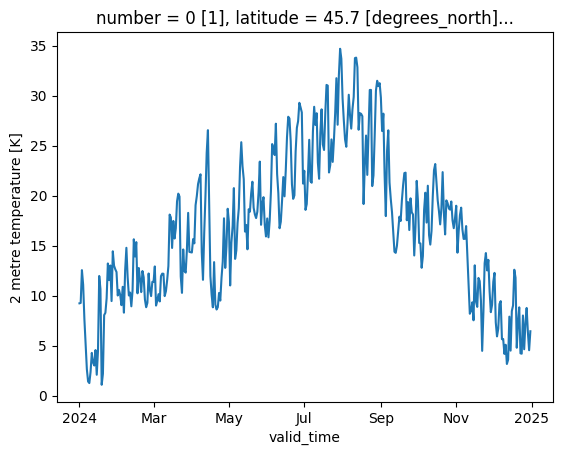

In [186]:
lat, lon = 45.7, 4.7 # Corresponding to a (lat, long) pair valid w.r.t the city we chose (here Lyon)

# ds.data_vars[datavar].values = ds.data_vars[datavar].values - 273.15 # Convert Kelvin to Celsius
ds[datavar].sel(latitude=lat, longitude=lon, method="nearest").plot()

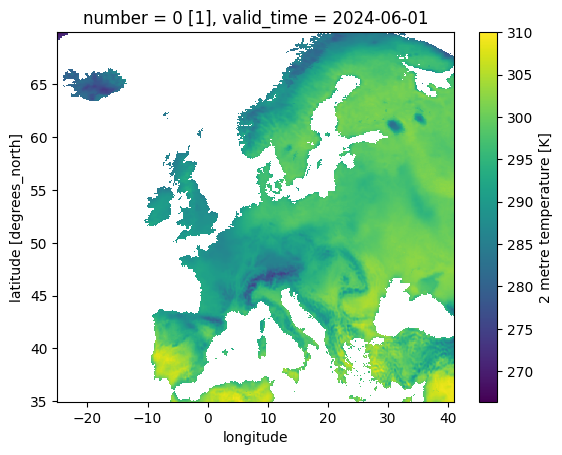

In [124]:
day = pd.to_datetime(f"{year}-06-01")

ds[datavar].sel(valid_time=day, method="nearest").plot()

### Multiple datasets

In [ ]:
filepaths = glob(f"{era5_data_folder}*_{variable}_{statistic}.nc")

In [ ]:
ds = xr.open_mfdataset(filepaths, combine="by_coords")
ds

<xarray.Dataset> Size: 2GB
Dimensions:     (valid_time: 2101, latitude: 350, longitude: 660)
Coordinates:
    number      int64 8B 0
  * latitude    (latitude) float64 3kB 69.9 69.8 69.7 69.6 ... 35.2 35.1 35.0
  * valid_time  (valid_time) datetime64[ns] 17kB 2020-01-01 ... 2025-10-01
  * longitude   (longitude) float64 5kB -25.0 -24.9 -24.8 ... 40.7 40.8 40.9
Data variables:
    u10         (valid_time, latitude, longitude) float32 2GB dask.array<chunksize=(23, 22, 42), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-04T23:34 GRIB to CDM+CF via cfgrib-0.9.1...

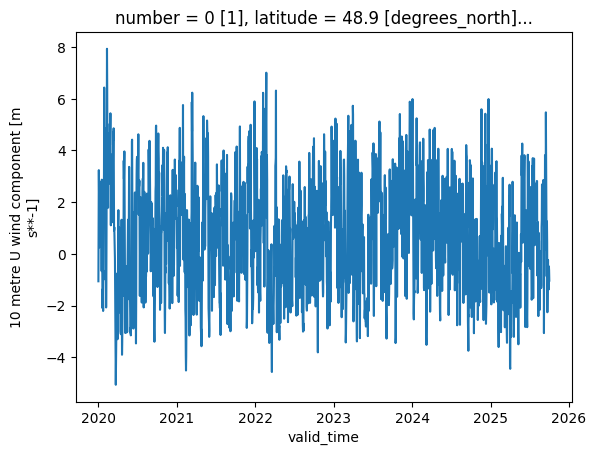

In [ ]:
ds[datavar].sel(latitude=lat, longitude=lon, method="nearest").plot()

# Normalized Difference Vegetation Index from Sentinel-2 (frequency = every 3 months)

The Normalized difference vegetation index (known as NDVI) is a simple, but effective index for quantifying green vegetation. Its values range from -1 to 1. More details on [sentinelhub](https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/ndvi/).

In [ ]:
ndvi_data_folder = main_data_folder + "sentinel2_ndvi/"

def quarter2timeperiod(year, quarter):
    if quarter == 1:
        return f"{year-1}-12-01_{year}-03-01"
    elif quarter == 2:
        return f"{year}-03-01_{year}-06-01"
    elif quarter == 3:
        return f"{year}-06-01_{year}-09-01"
    elif quarter == 4:
        return f"{year}-09-01_{year}-12-01"
    else:
        raise ValueError("quarter must be in 1, 2, 3, 4")

## Parametrize

In [ ]:
available_years = [2020, 2021, 2022, 2023]
available_quarters = [1, 2, 3, 4]

In [ ]:
year = 2020
quarter = 4

In [ ]:
timeperiod = quarter2timeperiod(year, quarter)

filepath  = f"{ndvi_data_folder}ndvi_{timeperiod}.tif"

## Manipulate and vizualize

In [ ]:
def convert_ndvi_to_real_scale(ndvi_img, out_meta):
    # The NDVI is stored in int8 format on a 0/254 scale, and nodata is 255.
    # This function converts it to a float format on a -1/1 scale, and replace nodata with np.nan.
    ndvi_img = ndvi_img.astype(float)
    ndvi_img[ndvi_img == out_meta["nodata"]] = np.nan
    ndvi_img = ndvi_img / 254 * 2 - 1
    return ndvi_img

def get_out_image_and_metadata(filepath, one_city_gdf):
    with rasterio.open(filepath) as src:
        one_city_gdf_in_good_crs = one_city_gdf.to_crs(src.crs)
        city_geometry = [one_city_gdf_in_good_crs.geometry.iloc[0]]
        out_image, out_transform = mask(src, city_geometry, crop=True)
        out_meta = src.meta

        out_meta.update({
            "height": out_image.shape[1],
            "width": out_image.shape[2],
            "transform": out_transform
        })

        real_out_image = convert_ndvi_to_real_scale(out_image, out_meta)

    return real_out_image, out_meta

In [ ]:
real_out_image, out_meta = get_out_image_and_metadata(filepath, one_city_gdf)

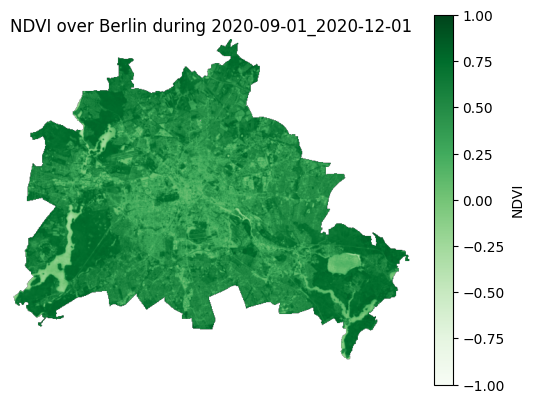

In [ ]:
plt.figure()
plt.imshow(real_out_image[0], cmap='Greens', vmin=-1, vmax=1)
plt.colorbar(label="NDVI")
plt.title(f"NDVI over {cityname} during {timeperiod}")
plt.axis('off')
plt.show()

In [ ]:
mean_ndvi = np.nanmean(real_out_image[0])
print(f"Mean NDVI over {cityname} during {timeperiod}: {mean_ndvi:.3f}")

Mean NDVI over Berlin during 2020-09-01_2020-12-01: 0.509


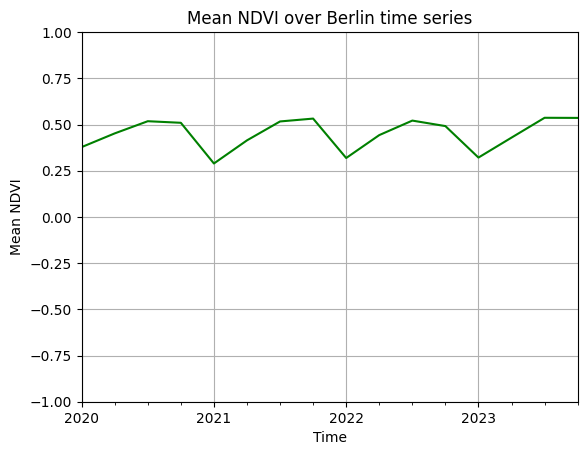

In [ ]:
mean_ndvi_time_series = pd.Series(dtype=float)
for year in available_years:
    for quarter in available_quarters:
        timeperiod = quarter2timeperiod(year, quarter)
        filepath  = f"{ndvi_data_folder}ndvi_{timeperiod}.tif"
        date = pd.to_datetime(timeperiod.split("_")[1])
        current_real_out_image, _ = get_out_image_and_metadata(filepath, one_city_gdf)
        current_mean_ndvi = np.nanmean(current_real_out_image[0])
        mean_ndvi_time_series.loc[date] = current_mean_ndvi

mean_ndvi_time_series = mean_ndvi_time_series.sort_index()

plt.figure()
mean_ndvi_time_series.plot(color='green')
plt.title(f"Mean NDVI over {cityname} time series")
plt.ylabel("Mean NDVI")
plt.xlabel("Time")
plt.ylim(-1, 1)
plt.grid()
plt.show()

## Reproject ERA5-Land features on the NDVI grid

In [ ]:
da = ds[datavar].sel(valid_time=day)
da

<xarray.DataArray 'u10' (latitude: 350, longitude: 660)> Size: 924kB
dask.array<getitem, shape=(350, 660), dtype=float32, chunksize=(22, 42), chunktype=numpy.ndarray>
Coordinates:
    number      int64 8B 0
  * latitude    (latitude) float64 3kB 69.9 69.8 69.7 69.6 ... 35.2 35.1 35.0
    valid_time  datetime64[ns] 8B 2020-06-01
  * longitude   (longitude) float64 5kB -25.0 -24.9 -24.8 ... 40.7 40.8 40.9
Attributes: (12/32)
    GRIB_paramId:                             165
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      6483600
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m s**-1
    long_name:                                10 metre U wind component
    units:                                    m s**-1
    standard_name:                            unknown
    GRIB_surface:                             0.0

In [ ]:
origin_transform = from_bounds(
    ds.longitude.min().item(),
    ds.latitude.min().item(),
    ds.longitude.max().item(),
    ds.latitude.max().item(),
    len(ds.longitude),
    len(ds.latitude)
)
origin_crs = "EPSG:4326"

target_transform = out_meta["transform"]
target_crs = out_meta["crs"]

In [ ]:
reprojected_da = da.rio.write_crs(origin_crs).rio.reproject(
    dst_crs=target_crs,
    shape=(out_meta["height"], out_meta["width"]),
    transform=target_transform,
)

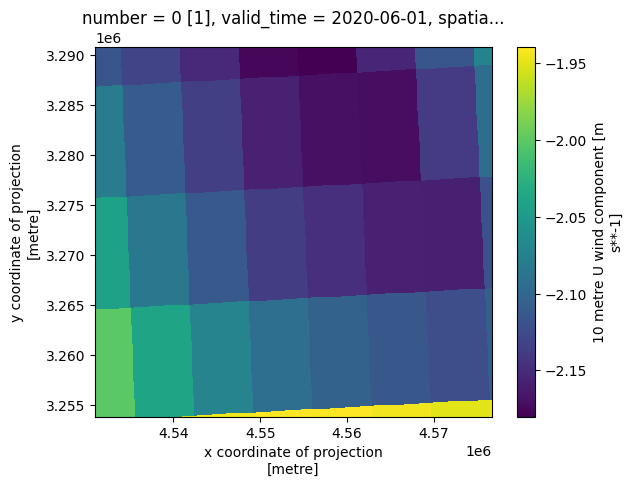

In [ ]:
reprojected_da.plot()

# Blended European Climate Assessment datasets

The data stems from the [European Climate Assessment & Dataset project website](https://www.ecad.eu/dailydata/predefinedseries.php).

The example dataset is "Daily maximum temperature TX" (ie. `ECA_blend_tx`).

In [ ]:
eca_tx_datafolder = main_data_folder + "ECA_blend_tx/"
stations_filepath = eca_tx_datafolder + "stations.txt"

## Filter weather stations

In [ ]:
def dms_to_decimal(dms_str):
    # This function converts a DMS (Degrees:Minutes:Seconds) string to decimal degrees.
    dms_str = dms_str.strip()

    sign = 1 if dms_str[0] == '+' else -1

    dms_str = dms_str[1:]

    parts = dms_str.split(':')
    degrees = float(parts[0])
    minutes = float(parts[1])
    seconds = float(parts[2])

    decimal = sign * (degrees + minutes/60 + seconds/3600)

    return decimal

In [ ]:
stations_df = pd.read_csv(
    stations_filepath,
    skiprows=17,
    skipinitialspace=True
)

stations_df['LAT_decimal'] = stations_df['LAT'].apply(dms_to_decimal)
stations_df['LON_decimal'] = stations_df['LON'].apply(dms_to_decimal)

stations_gdf = gpd.GeoDataFrame(
    stations_df,
    geometry=gpd.points_from_xy(stations_df['LON_decimal'], stations_df['LAT_decimal']),
    crs="EPSG:4326" # (WGS84, adequate for lat/lon coordinates)
).drop(columns=['LAT', 'LON', 'LAT_decimal', 'LON_decimal'])

print(f"Number of registered stations: {len(stations_gdf)}")
stations_gdf.head()

Number of registered stations: 8568


,STAID,STANAME,CN,HGHT,geometry
0,1,VAEXJOE,SE,166,POINT (14.8 56.86667)
1,2,FALUN,SE,160,POINT (15.61667 60.61667)
2,3,STENSELE,SE,325,POINT (17.16639 65.06667)
3,4,LINKOEPING,SE,93,POINT (15.53306 58.4)
4,5,LINKOEPING-MALMSLAETT,SE,93,POINT (15.53306 58.4)


In [ ]:
one_city_gdf.to_crs(stations_gdf.crs, inplace=True) # Use same CRS for spatial operations

stations_in_city_gdf = stations_gdf[stations_gdf.within(one_city_gdf.geometry.iloc[0])]

print(f"Number of registered stations within {cityname}: {len(stations_in_city_gdf)}")
stations_in_city_gdf.head()

Number of registered stations within Berlin: 20


,STAID,STANAME,CN,HGHT,geometry
34,41,BERLIN-DAHLEM,DE,51,POINT (13.30167 52.46389)
1142,2759,BERLIN-TEMPELHOF,DE,48,POINT (13.40389 52.46833)
1611,4005,BERLIN-TEGEL,DE,36,POINT (13.31056 52.56556)
2091,4529,BERLIN-BUCH,DE,60,POINT (13.50389 52.6325)
2095,4533,BERLIN-DAHLEM (LFAG),DE,55,POINT (13.30139 52.45778)


## Manipulate and vizualize

In [ ]:
# Select a station to study
selected_station = stations_in_city_gdf.iloc[9]

In [ ]:
selected_station_gdf = gpd.GeoDataFrame([selected_station], crs=stations_in_city_gdf.crs)
selected_station_STAID = selected_station['STAID']

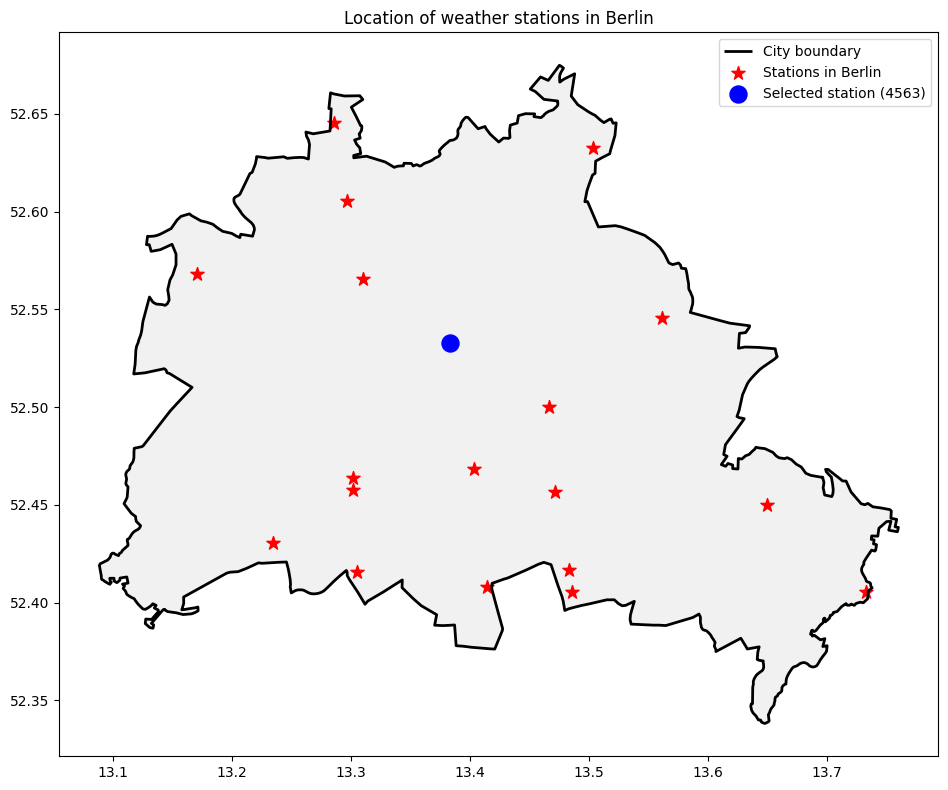

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

one_city_gdf.boundary.plot(ax=ax, color='black', linewidth=2, label='City boundary')
one_city_gdf.plot(ax=ax, alpha=0.3, color='lightgray')

stations_in_city_gdf.plot(ax=ax, color='red', markersize=100, marker='*', label=f'Stations in {cityname}')
selected_station_gdf.plot(ax=ax, color='blue', markersize=150, marker='o', label=f'Selected station ({selected_station_STAID})')

plt.legend()
plt.title(f"Location of weather stations in {cityname}")
plt.tight_layout()
plt.show()

In [ ]:
station_data_filepath = eca_tx_datafolder + f"TX_STAID{selected_station_STAID:06d}.txt"

In [ ]:
station_data_df = pd.read_csv(
    station_data_filepath,
    skiprows=20,
    skipinitialspace=True
)

valid_data_df = station_data_df[station_data_df['Q_TX'] == 0].copy() # Q_TX is the quality code for TX (0='valid')
valid_data_df['DATE'] = pd.to_datetime(valid_data_df['DATE'], format='%Y%m%d')
valid_data_df['TX_celsius'] = valid_data_df['TX'] / 10 # Convert temperature to °C (originally stored in 0.1°C unit)

tx_timeseries = pd.Series(
    valid_data_df['TX_celsius'].values,
    index=valid_data_df['DATE']
)

print(f"Number of valid daily records for station {selected_station_STAID}: {len(tx_timeseries)}")

Number of valid daily records for station 4563: 54475


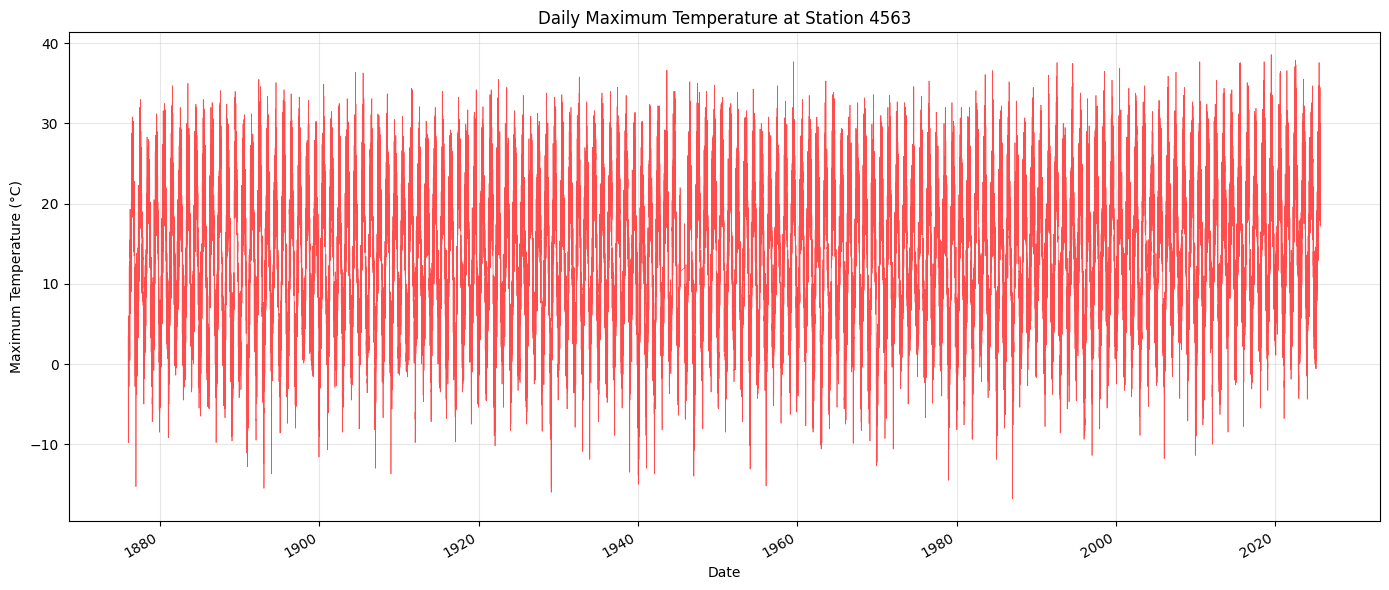

In [ ]:
plt.figure(figsize=(14, 6))
tx_timeseries.plot(color='red', linewidth=0.5, alpha=0.7)
plt.title(f"Daily Maximum Temperature at Station {selected_station_STAID}")
plt.ylabel("Maximum Temperature (°C)")
plt.xlabel("Date")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()